<a href="https://colab.research.google.com/github/Seungwon-hub/ESAA/blob/main/ESAA_OB_Week1_ModelTraining2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **4.5 규제가 있는 선형 모델**

과대적합을 감소시키는 좋은 방법은 모델을 규제하는 것임. 다항 회귀 모델을 규제하는 간단한 방법은 다항식의 차수를 감소시키는 것임. 선형 회귀 모델에서는 보통 모델의 가중치를 제한함으로써 규제를 가함.

< 가중치 제한하는 법 >
1. 릿지 회귀
2. 라쏘 회귀
3. 엘라스틱 넷

## 4.5.1 릿지 회귀

릿지 회귀는 규제가 추가된 선형 회귀 버전임. 규제항이 비용 함수에 추가됨. 이는 학습 알고리즘을 데이터에 맞추는 것뿐만 아니라 모델의 가중치가 가능한 한 작게 유지되도록 노력함. 규제항은 훈련하는 동안에만 비용 함수에 추가됨. 모델 훈련이 끝나면 모델의 성능을 규제가 없는 성능 지표로 평가함.

하이퍼파라미터 alpha는 모델을 얼마나 많이 규제할지 조절함. alpha=0이면 릿지 회귀는 선형 회귀와 같아짐. alpha가 아주 크면 모든 가중치가 거의 0에 가까워지고 결국 데이터의 평균을 지나는 수평선이 됨.

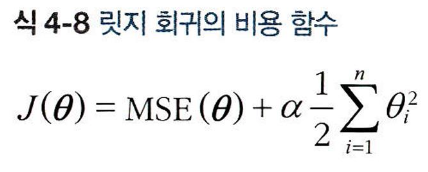

[그림 4-17]은 선형 데이터에 몇 가지 다른 alpha 사용해 릿지 모델을 훈련시킨 결과임.

왼쪽 그래프는 평범한 릿지 모델을 사용해 선형적인 예측을 만듦.

오른쪽 그래프는 PolynomialFeatures(degree=10)을 사용해 먼저 데이터를 확장하고 StandardScaler를 사용해 스케일을 조정한 후 릿지 모델 적용함. alpha를 증가시킬수록 직선에 가까워짐. 즉, 모델의 분산은 줄지만 편향은 커짐.

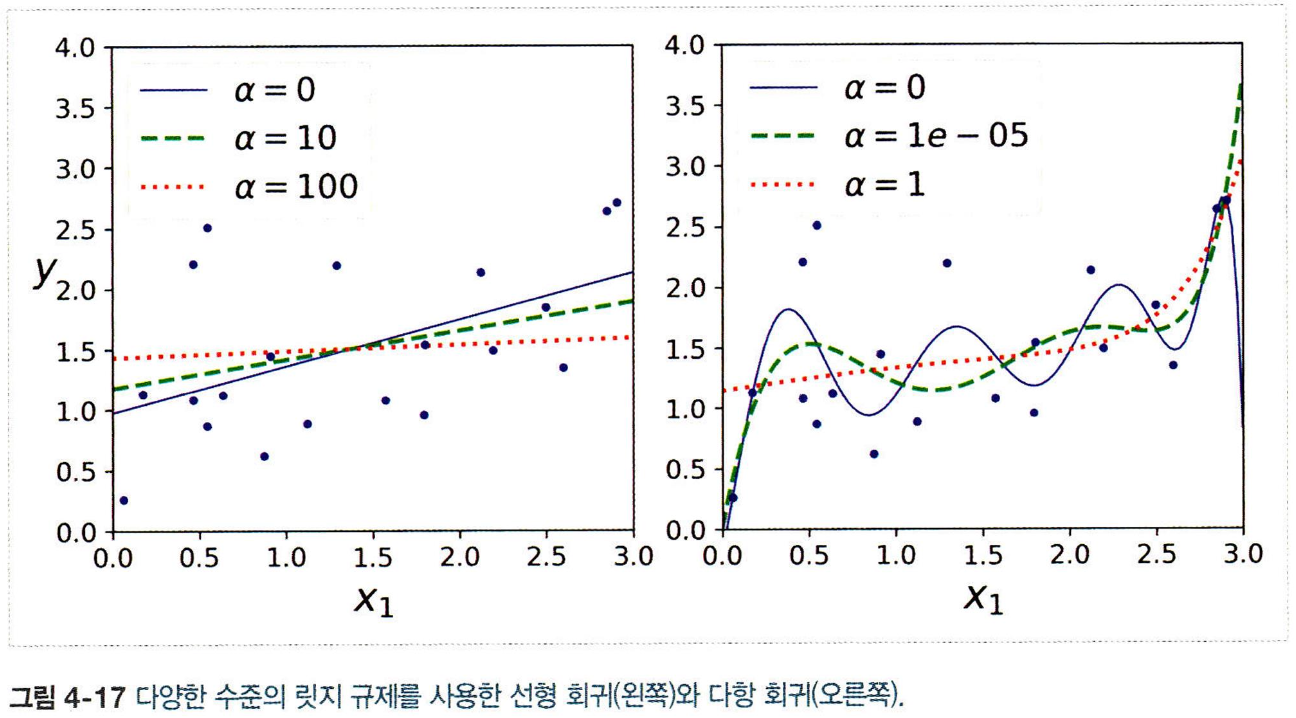

In [ ]:
import numpy as np

m = 100

X = 6 * np.random.rand(m,1)-3

y = 0.5 * X **2 + X + 2 + np.random.randn(m,1)

In [ ]:
# 사이킷런에서 정규방정식을 사용한 릿지 회귀 적용
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([5.02470819])

In [ ]:
# 확률적 경사 하강법을 사용
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.00226186])

penalty 매개변수는 사용할 규제를 지정함. "l2"는 SGD가 비용 함수에 가중치 벡터의 l2 노름의 제곱을 2로 나눈 규제항을 추가하게 만듦. 즉, 릿지 회귀와 같음.

## 4.5.2 라쏘 회귀

라쏘 회귀는 선형 회귀의 또 다른 규제된 버전임. 비용 함수에 규제항을 더하지만 l2 노름의 제곱을 2로 나눈 것 대신 가중치 벡터의 l1 노름을 사용함.

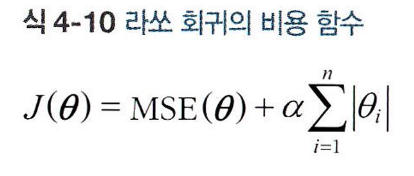

[그림 4-18]은 [그림 4-17]과 같지만 릿지 모델 대신 라쏘 모델과 조금 더 작은 alpha값을 사용함.

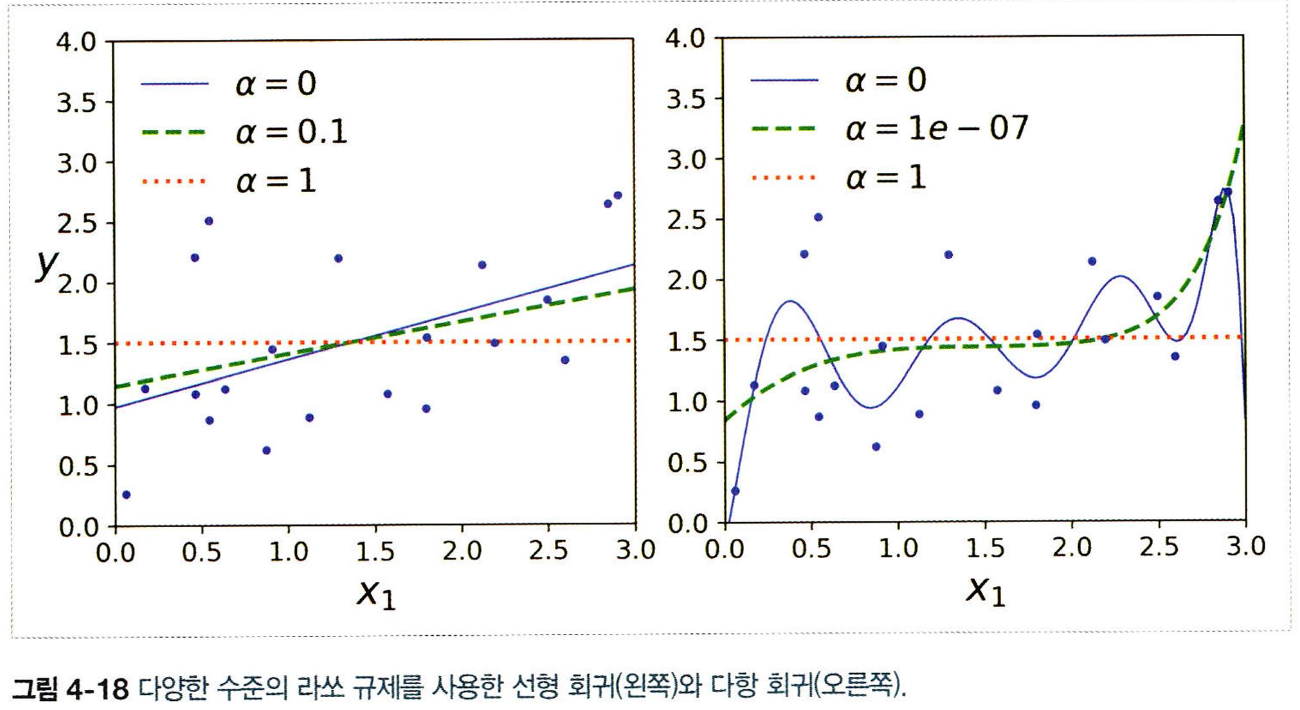

라쏘 회귀의 중요한 특징은 덜 중요한 특성의 가중치를 제거하려고 한다는 점임. 오른쪽 그래프에서 초록 점선은 2차방정식처럼 보이며 거의 선형적임. 차수가 높은 다항 특성의 가중치가 모두 0이 됨. 다시 말해 라쏘 회귀는 자동으로 특성 선택을 하고 희소 모델을 만듦.

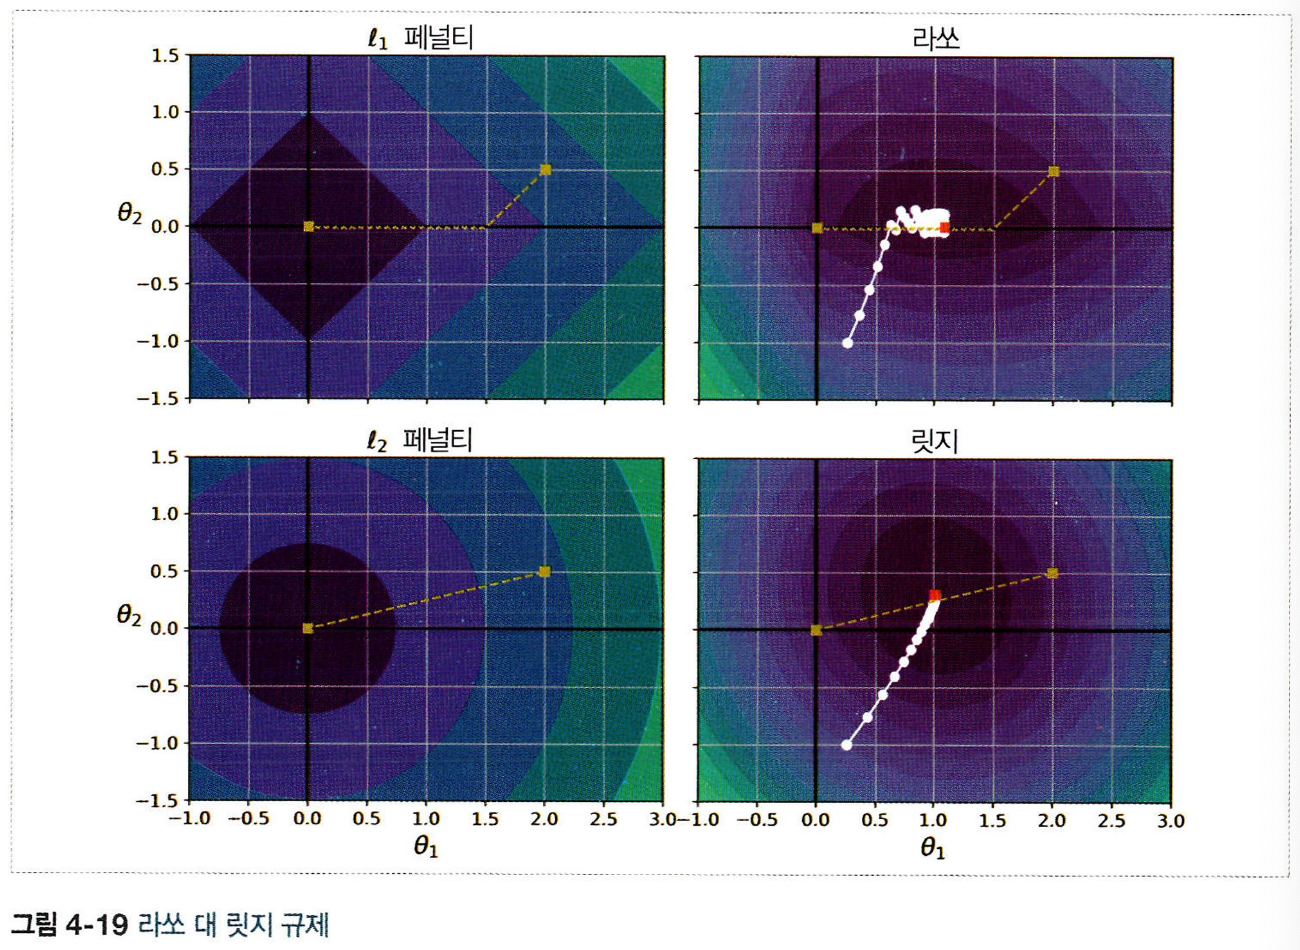

두 축은 모델 파라미터 두 개를 나타내고 배경의 등고선은 각기 다른 손실 함수를 나타냄.

왼쪽 위 그래프의 등고선은 l1 손실 (|theta1|+|theta2|)를 나타냄. 축에 가까워지면서 선형적으로 줄어듦. 예를 들어 theta1=2, theta2=0.5로 초기화하고 경사 하강법을 실행하면 두 파라미터가 동일하게 감소될 것임. 따라서 theta2가 먼저 0에 도달하고 그다음 경사 하강법이 theta1=0에 도달할 때까지 축을 따라 내려감.

오른쪽 위 그래프의 등고선은 라쏘 손실 함수를 나타냄. 하얀 작은 원이 경사 하강법이 theta1=0.25, theta2=-1로 초기화된 모델 파라미터를 최적화하는 과정을 보여줌. 여기에서도 theta2=0으로 빠르게 줄어들고 그다음 축을 따라 진동하면서 전역 최적점에 도달함.

왼쪽 아래 그래프에서 l2 손실은 원점에 가까울수록 줄어드는 것을 볼 수 있음. 따라서 경사 하강법이 원점까지 직선 경로를 따라감.

오른쪽 아래 그래프의 등고선은 릿지 회귀의 비용 함수를 나타냄.

<라쏘와 다른 점>
1. 파라미터가 전역 최적점에 가까워질수록 그레이디언트가 작아짐
2. alpha를 증가시킬수록 최적의 파라미터가 원점에 더 가까워짐. 하지만 완전히 0이 되지는 않음

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.9760972])

## 4.5.3 엘라스틱넷

엘라스틱넷은 릿지 회귀와 라쏘 회귀를 절충한 모델임. 규제항은 릿지와 회귀의 규제항을 단순히 더해서 사용하며, 혼합 정도는 혼합 비율 r을 사용해 조절함. r=0이면 엘라스틱넷은 릿지 회귀와 같고, r=1이면 라쏘 회귀와 같음.

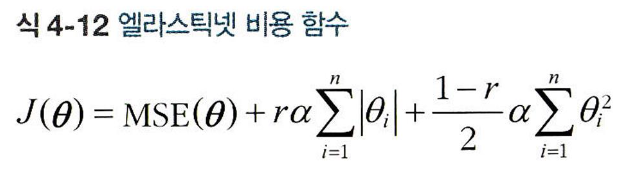

적어도 규제가 약간 있는 것이 대부분의 경우에 좋으므로 일반적으로 평범한 선형 회귀는 피해야 함. 릿지가 기본이 되지만 쓰이는 특성이 몇 개뿐이면 라쏘나 엘라스틱넷이 나음. 이 모델들은 불필요한 특성의 가중치를 0으로 만들어 줌. 특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있을 때는 라쏘보다는 엘라스틱넷을 선호함.

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5) # l1_ratio = 혼합 비율
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.97948926])

## 4.5.4 조기 종료

조기 종료는 검증 에러가 최솟값에 도달하면 바로 훈련을 중지시키는 것임. [그림 4-20]은 배치 경사 하강법으로 훈련시킨 복잡한 모델을 보여줌. 에포크가 진행됨에 따라 알고리즘이 점차 학습되어 훈련 세트에 대한 예측 에러(RMSE)와 검증 세트에 대한 예측 에러가 줄어듦. 그러나 감소하던 검증 에러가 멈추었다가 다시 상승함. 모델이 훈련 데이터에 과대적합되기 시작하는 것을 의미함. 조기 종료는 에러가 최소에 도달하는 즉시 훈련을 멈추는 것임.

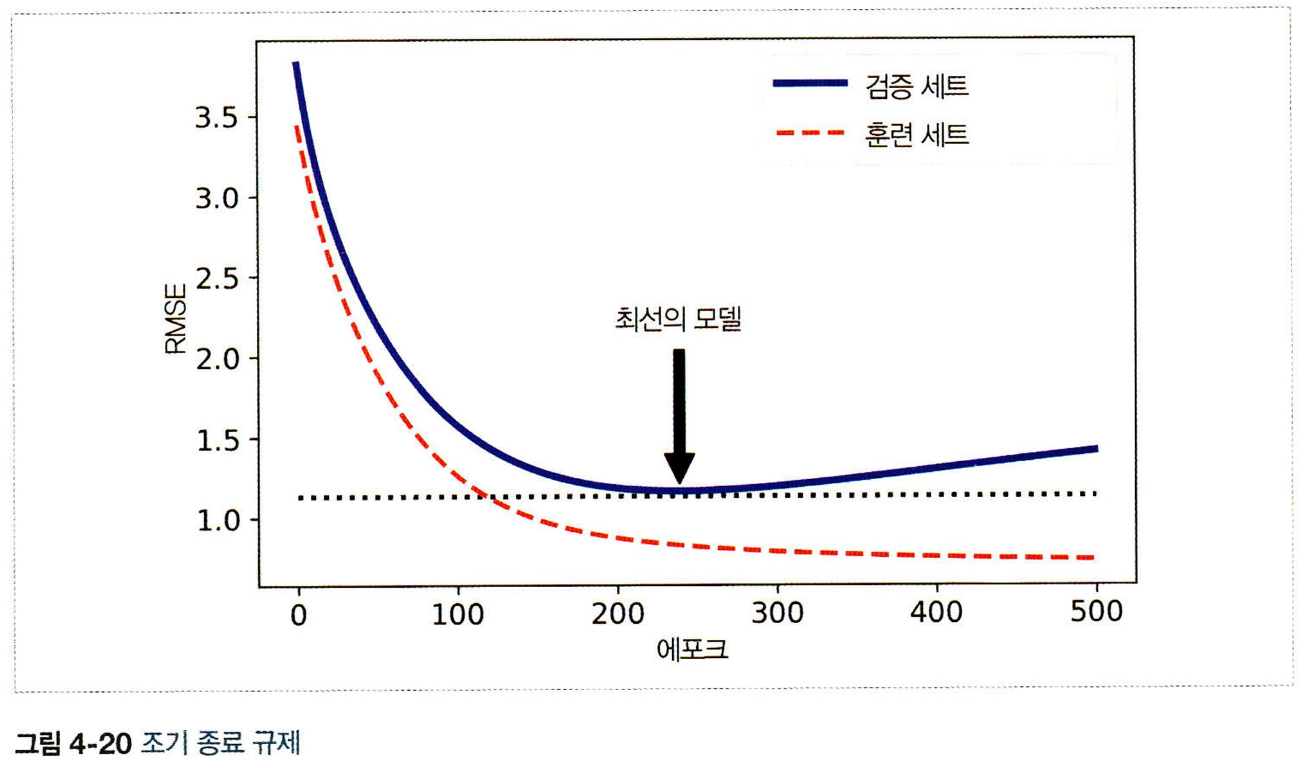

In [ ]:
from sklearn.base import clone
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)

# 데이터 준비
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                       penalty=None, learning_rate='constant', eta0=0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None

for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train.ravel())
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

# **4.6 로지스틱 회귀**

로지스틱 회귀는 샘플이 특정 클래스에 속할 확률을 추정하는 데 널리 사용됨. 추정 확률이 50%가 넘으면 모델은 그 샘플이 해당 클래스에 속한다고 예측함. 아니면 클래스에 속하지 않는다고 예측함.

## 4.6.1 확률 추정

로지스틱 회귀 모델은 입력 특성의 가중치 합을 계산함. 로지스틱은 0과 1 사이의 값을 출력하는 시그모이드 함수임.

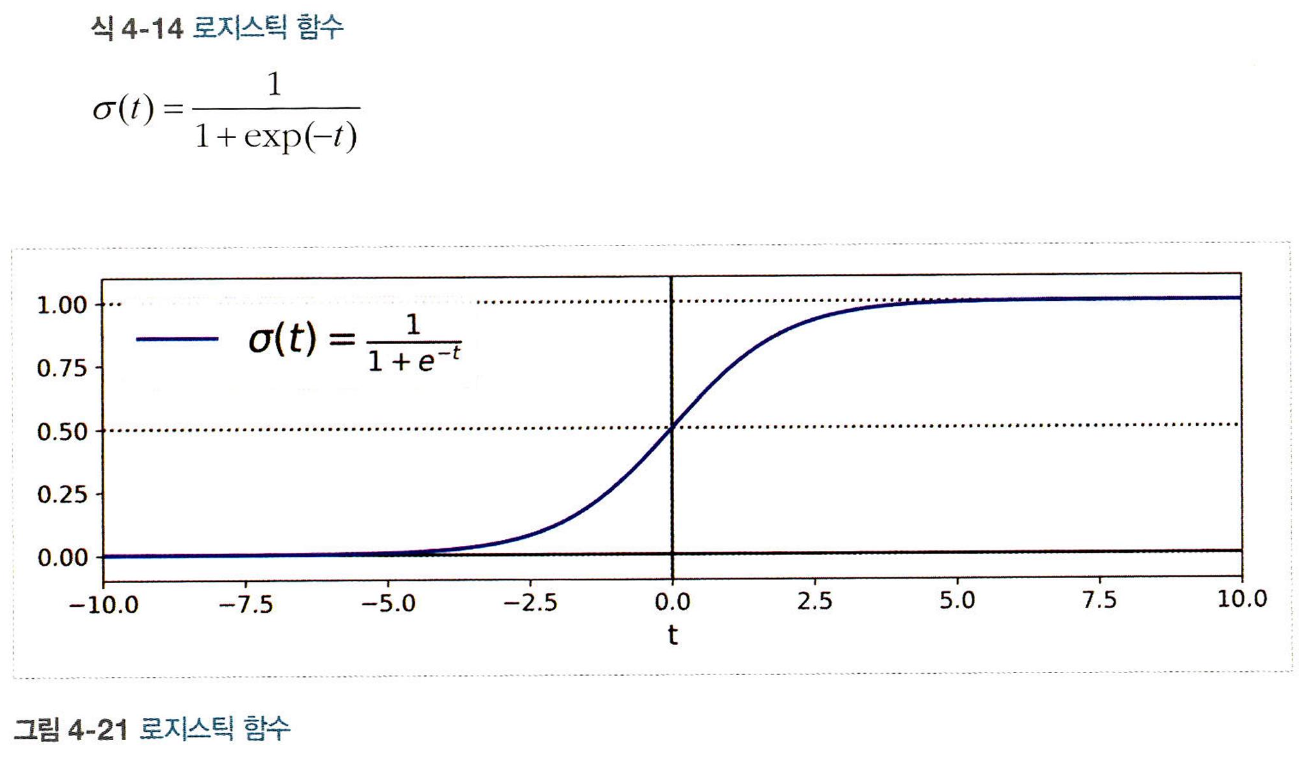

## 4.6.2 훈련과 비용 함수

로지스틱 회귀 모델 훈련의 목적은 양성 샘플에 대해서는 높은 확률을 추정하고 음성 샘플에 대해서는 낮은 확률을 추정하는 모델의 파라미터 벡터를 찾는 것임.

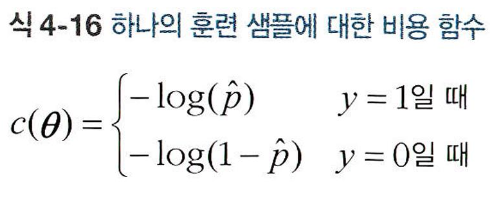

이 비용 함수는 t가 0에 가까워지면 -log(t)가 매우 커지므로 타당함. 그러므로 모델이 양성 샘플을 0에 가까운 확률로 추정하면 비용이 크게 증가할 것임. 또한 음성 샘플을 1에 가까운 확률로 추정해도 비용이 증가할 것임.

반면에 t가 1에 가까우면 -log(t)는 0에 가까워짐. 따라서 음성 샘플의 확률을 0에 가깝게 추정하거나 양성 샘플의 확률을 1에 가깝게 추정하면 비용은 0에 가까워질 것임.

## 4.6.3 결정 경계

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
X = iris['data'][:, 3:] # 꽃잎의 너비
y = (iris['target'] == 2).astype(int) # Iris-Virginica면 1, 그렇지 않으면 0

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

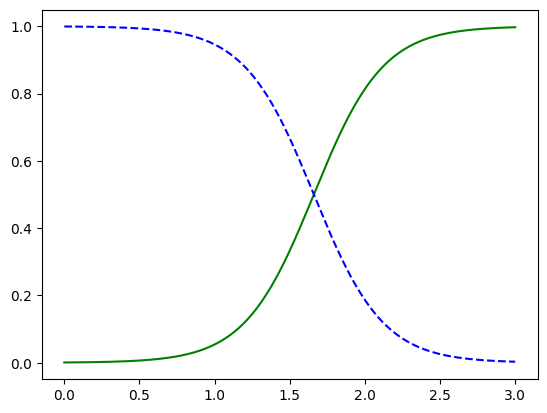

In [ ]:
import matplotlib.pyplot as plt

X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label='Iris virginica')
plt.plot(X_new, y_proba[:, 0], "b--", label='Not Iris virginica')

In [ ]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

## 4.6.4 소프트맥스 회귀

소프트맥스 회귀 또는 다항 로지스틱 회귀는 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화될 수 있음. 개념은 샘플 x가 주어지면 먼저 소프트맥스 회귀 모델이 각 클래스 k에 대한 점수를 계산하고, 그 점수에 소프트맥스 함수를 적용하여 각 클래스의 확률을 추정함. 각 클래스는 자신만의 파라미터 벡터가 있음. 이 벡터들은 파라미터 행렬에 행으로 저장됨. 샘플 x에 대해 각 클래스의 점수가 계산되면 소프트맥스 함수를 통과시켜 클래스 k에 속할 확률 pk를 추정할 수 있음.

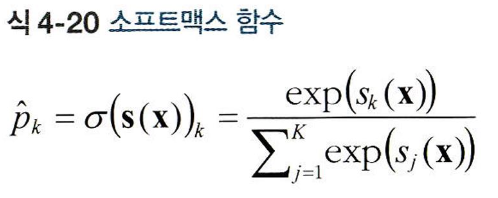

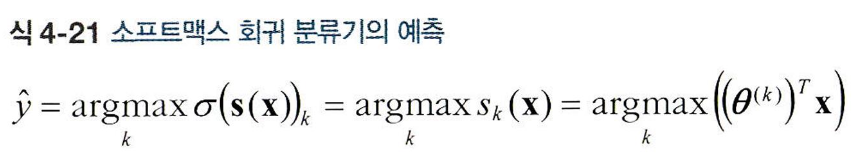

소프트맥스 회귀 분류기는 한 번에 하나의 클래스만 예측함. 그래서 종류가 다른 붓꽃 같이 상호 배타적인 클래스에서만 사용해야 함. 하나의 사진에서 여러 사람의 얼굴을 인식하는 데는 사용할 수 없음.

In [ ]:
X = iris["data"][:, (2,3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class = "multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10, multi_class='multinomial')

In [ ]:
softmax_reg.predict([[5,2]])

array([2])

In [ ]:
softmax_reg.predict_proba([[5,2]])

array([[6.21626374e-07, 5.73689802e-02, 9.42630398e-01]])

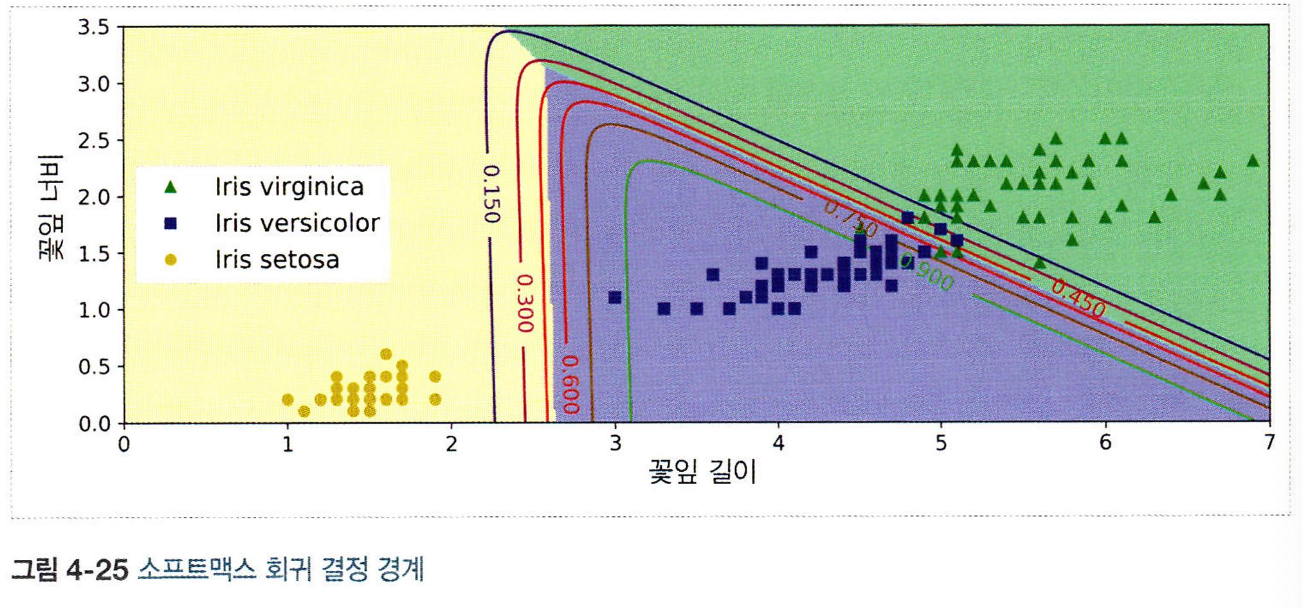